c:\Users\haydn\aicorework\DataAnalysisProject\db_utils.py:70: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column])
c:\Users\haydn\aicorework\DataAnalysisProject\db_utils.py:70: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column])
c:\Users\haydn\aicorework\DataAnalysisProject\db_utils.py:70: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column])
c:\Users\haydn\aicorework\DataAnalysisProject\db_utils.py:70: UserWarning: Could not infer format, so each

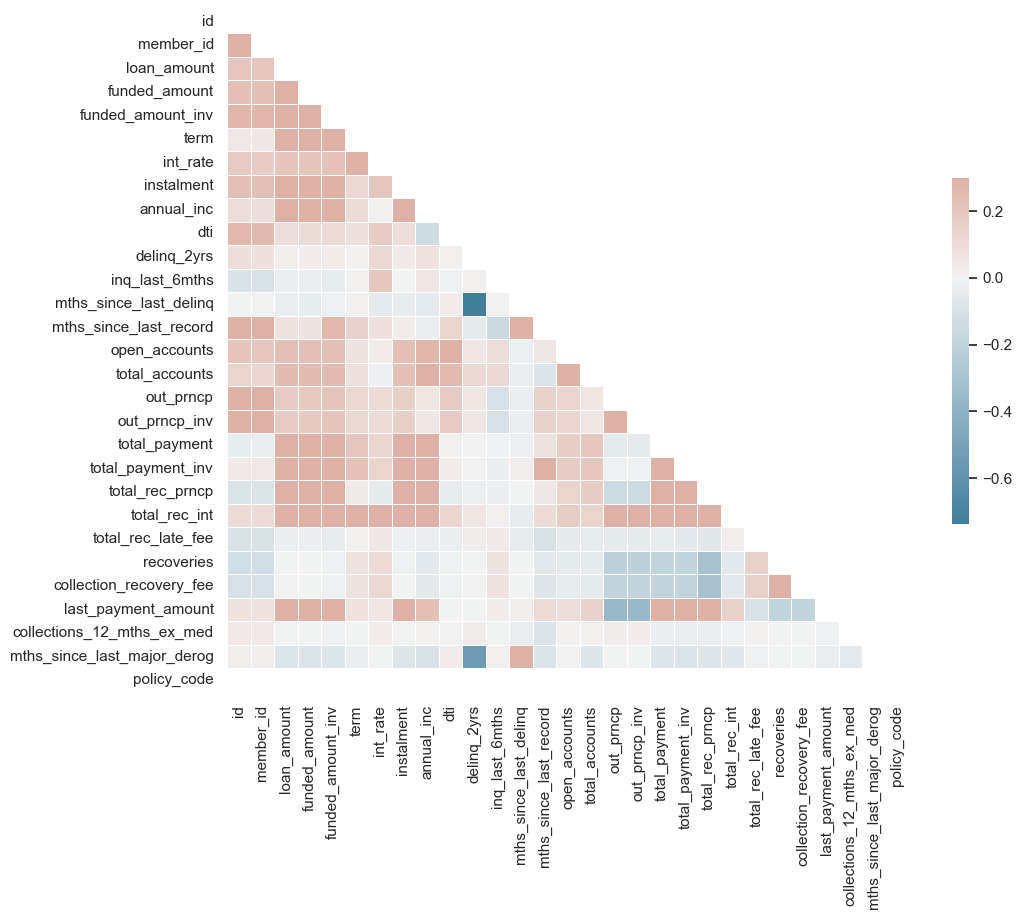

None


In [11]:
import db_utils as db

creds = db.GetCreds()
db_connect = db.RDSDatabaseConnector(creds)
db_connect.RDSConnection()
db_connect.RDSExtract()
#db_connect.RDSSaveToCSV()

db_convert = db.DataTransform(db_connect.loan_payments)
db_convert.convert_to_datetime(['issue_date','last_payment_date','next_payment_date','earliest_credit_line'])
db_convert.convert_to_int()
db_convert.convert_int_to_flt()

#db_frame = db.DataFrameInfo(b.df)
#print(db_frame.get_null_values())
#print(db_frame.get_shape())

db_trans = db.DataFrameTransform(db_convert.df)
db_trans.null_values()
db_plot = db.Plotter(db_trans.df)
#db_plot.plot_frame()
db_trans.data_impute(['funded_amount','term', 'int_rate','collections_12_mths_ex_med'], 'mean')
#db_plot.plot_frame()
db_trans.data_impute(['employment_length', 'last_payment_date', 'last_credit_pull_date'], 'mode')
#db_plot.skewness()
db_trans.correct_skew()
db_new_plot = db.Plotter(db_trans.newdf)
db_analysis = db.DataAnalysis(db_trans.df)
#db_trans.correlation()
#db_analysis.loan_loss()
#db_analysis.possible_loss()
#db_analysis.indicator_of_loss()
#db_plot.state_of_loans()
#db_new_plot.skewness()
db_new_plot.corr_matrix()
print(db_new_plot.df.corr(numeric_only = True))
#db_plot.plot_frame()
#print(db_trans.null_percent)